In [1]:
import tweepy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

In [2]:
# removing the new line characters
with open('../auth_keys.txt') as f:
    lines = [line.rstrip() for line in f]

In [ ]:
Consumer_Key = lines[0]
Consumer_Secret = lines[1]
Bearer_Token = lines[2]
Access_Token = lines[3]
Access_Secret = lines[4]

In [8]:
client = tweepy.Client(Bearer_Token)

In [11]:
method_use = client.search_recent_tweets # method to use
query = '#monkeypox #health OR #covid health -is:retweet lang:en'
count = 100 # 100 tweets per page
limit = 10 # Number of pages

In [22]:
# Using paginator
# https://twittercommunity.com/t/is-the-date-not-sent-in-rfc-3339-in-the-get-tweets-search-recent-search-method-query/176956
paginator = tweepy.Paginator(method_use,
                            query=query,
                            max_results=count,
                            limit=limit,
                            start_time='2022-10-7T20:05:00Z')

tweet_list = []
for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

The lethal effects of Covid-19 will remain as long as we ignore science. (Disagree? Then please piss off.) #COVID
 https://t.co/ZNqljesWk0
📃 #ScientificResearch: Socioeconomic and immigration status and COVID-19 testing in Toronto, Ontario: retrospective cross-s... @EthicSeido #covid #science #health #medical #study #research #covid19 #SARSCoV2 
⬇️
 https://t.co/j8MGaUTnqC
@robreiner What about #covid health decisions?  Go to bed old man.
You can lose many things and rebuild. You can survive, overcome, and thrive. But if you lose your health, sometimes you will linger in the space between life and death until your actual death.

Protect your health. 

#CovidIsntOver #COVID
'We’re worried about #Covid and about #flu. Joint pressures which could increase demand, strip back workforces, introduce the need for greater infection control measures, and have a knock-on effect on services.' @Saffron_Policy @NHSProviders @Independent
https://t.co/lomqCXWwY3
Here is another amazing benefit hospita

In [23]:
for tweet in paginator.flatten(): # Total number of tweets to retrieve
    print(tweet.text)

The lethal effects of Covid-19 will remain as long as we ignore science. (Disagree? Then please piss off.) #COVID
 https://t.co/ZNqljesWk0
📃 #ScientificResearch: Socioeconomic and immigration status and COVID-19 testing in Toronto, Ontario: retrospective cross-s... @EthicSeido #covid #science #health #medical #study #research #covid19 #SARSCoV2 
⬇️
 https://t.co/j8MGaUTnqC
@robreiner What about #covid health decisions?  Go to bed old man.
You can lose many things and rebuild. You can survive, overcome, and thrive. But if you lose your health, sometimes you will linger in the space between life and death until your actual death.

Protect your health. 

#CovidIsntOver #COVID
'We’re worried about #Covid and about #flu. Joint pressures which could increase demand, strip back workforces, introduce the need for greater infection control measures, and have a knock-on effect on services.' @Saffron_Policy @NHSProviders @Independent
https://t.co/lomqCXWwY3
Here is another amazing benefit hospita

In [46]:
# Creating new dataframe and new features
df = pd.DataFrame(tweet_list)

In [47]:
df_text = pd.DataFrame(df.text) # to make it a dataframe

In [48]:
df_text.head(5)

,text
0,The lethal effects of Covid-19 will remain as ...
1,📃 #ScientificResearch: Socioeconomic and immig...
2,@robreiner What about #covid health decisions?...
3,You can lose many things and rebuild. You can ...
4,'We’re worried about #Covid and about #flu. Jo...


In [62]:
df_text.shape

(46, 1)

In [63]:
df_string  = df_text

### **Data Preprocessing**

In [64]:
# https://stackoverflow.com/questions/12851791/removing-numbers-from-string
import re
import string
def preprocess_tweets(sent):
    '''Cleans text data up, leaving only 2 or
        more char long non-stepwords composed of A-Z & a-z only
        in lowercase'''
    # lowercase
    sentence = sent.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ",sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Removing digits
    sentence = sentence.translate(str.maketrans('', '', string.digits))

    # Removing puntuactions
    # sentence = sentence.translate(str.maketrans('', '', string.punctuation))

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  
    # When we remove apostrophe from the word "Mark's", 
    # the apostrophe is replaced by an empty space. 
    # Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  
    # Next, we remove all the single characters and replace it by a space 
    # which creates multiple spaces in our text. 
    # Finally, we remove the multiple spaces from our text as well.

    return sentence


In [65]:
df_string.loc[:,'cleaned_tweets'] = df_string.loc[:,'text'].apply(preprocess_tweets)

In [66]:
df_string.loc[:,:].head(5)

,text,cleaned_tweets
0,The lethal effects of Covid-19 will remain as ...,the lethal effects of covid will remain as lon...
1,📃 #ScientificResearch: Socioeconomic and immig...,scientificresearch socioeconomic and immigrat...
2,@robreiner What about #covid health decisions?...,what about covid health decisions go to bed o...
3,You can lose many things and rebuild. You can ...,you can lose many things and rebuild you can s...
4,'We’re worried about #Covid and about #flu. Jo...,we re worried about covid and about flu joint...


## **Generating Sentiment Labels**

- positive sentiment: compound score >= 0.5

- neutral sentiment: (compound score > -0.5) and (compound score < 0.5)

- negative sentiment: compound score <= -0.5

In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import textblob

In [68]:
# https://vadersentiment.readthedocs.io/en/latest/pages/about_the_scoring.html
df_string[['polarity','subjectivity']] = (df_string.cleaned_tweets.apply
                                            (lambda x: pd.Series(textblob.TextBlob
                                            (x).sentiment)))

for index,row in enumerate(df_string['cleaned_tweets']):
    score = analyzer.polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    compound = score['compound']
    if compound <= -0.5:
        df_string.loc[index, 'sentiment'] = "negative" # making new columns are appending the values; negative,etc 
    elif compound >= 0.5:
        df_string.loc[index, 'sentiment'] = "positive"
    else:
        df_string.loc[index, 'sentiment'] = "neutral"
    # Appending the score values to the columns
    df_string.loc[index, 'neg'] = neg
    df_string.loc[index, 'neu'] = neu
    df_string.loc[index, 'pos'] = pos
    df_string.loc[index, 'compound'] = compound

In [69]:
df_string.shape

(46, 9)

In [70]:
df_string.sample(n=5,random_state=42)

,text,cleaned_tweets,polarity,subjectivity,sentiment,neg,neu,pos,compound
39,#COVID-19 crisis is a tipping point. Will we i...,covid crisis is tipping point will we invest ...,0.000000,0.000000,negative,0.215,0.785,0.000,-0.6249
25,"As you may know I’m recovering from COVID, and...",as you may know recovering from covid and want...,0.000000,0.000000,positive,0.000,0.764,0.236,0.7003
26,@justin_hart It’s Time to Follow the Science: ...,hart it time to follow the science masks covid,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
44,Boost your immune system 🙏❤ #UkrainianArmy #au...,boost your immune system ukrainianarmy audiole...,0.000000,0.000000,positive,0.000,0.726,0.274,0.5994
35,Lessons learned on what policy can bring: the ...,lessons learned on what policy can bring the g...,-0.033333,0.488889,neutral,0.133,0.758,0.110,-0.1531


### **Sentiment Visaulisation & EDA**

In [74]:
df_eda = df_string[['cleaned_tweets','sentiment']]
df_eda.sample(n=5,random_state=42)

,cleaned_tweets,sentiment
39,covid crisis is tipping point will we invest ...,negative
25,as you may know recovering from covid and want...,positive
26,hart it time to follow the science masks covid,neutral
44,boost your immune system ukrainianarmy audiole...,positive
35,lessons learned on what policy can bring the g...,neutral


In [128]:
df_eda.sentiment.value_counts()

neutral     28
negative     9
positive     8
Name: sentiment, dtype: int64

In [76]:
df_eda.duplicated().sum()

1

In [77]:
df_eda.drop_duplicates(inplace=True)

In [78]:
df_eda.shape

(45, 2)

**Count Plot**

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.set_theme(style="darkgrid")
# sns.countplot(data=df_copy,x='Language')
sns.countplot(data=df_copy,
            # Default ascending is True and but is reversed by -1
            order=df_language_sort.sort_values().index[::-1],
            x='Language')

ax.tick_params(axis="x",rotation=-90)
ax.set_xlabel("Language", fontdict={'fontsize':20})
fig.suptitle("Language Count", fontdict={'fontsize':30})

Text(0.5, 1.0, 'Sentiment Count')

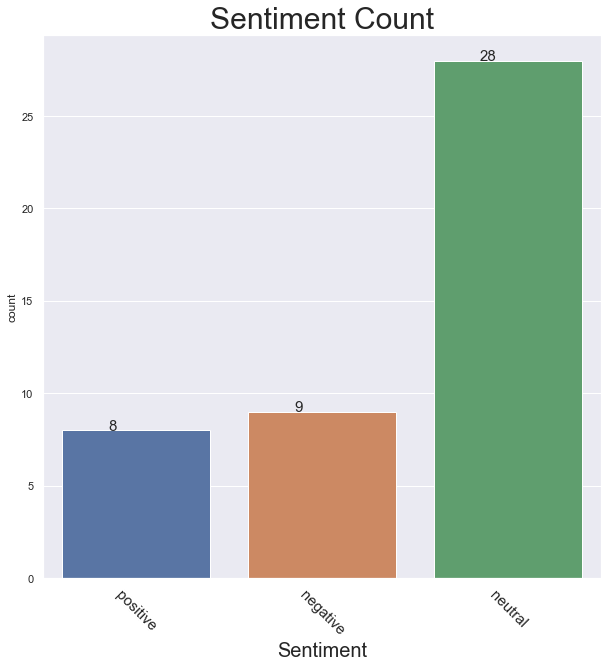

In [138]:
fig,ax = plt.subplots(figsize=(10,10))
sns.set_theme(style="darkgrid")
ordering = df_eda.sentiment.value_counts(ascending=True).index[::1] #Ascending
sns.countplot(data=df_eda,x='sentiment',order=ordering)
ax.tick_params(axis="x",rotation=-45)

ax.set_xticklabels(fontsize=15,labels=ordering)


for p in ax.patches:
   ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), size=15)
         
ax.set_xlabel("Sentiment", fontdict={'fontsize':20})
ax.set_title("Sentiment Count", fontdict={'fontsize':30})

In [140]:
df_eda.head()

,cleaned_tweets,sentiment
0,the lethal effects of covid will remain as lon...,negative
1,scientificresearch socioeconomic and immigrat...,neutral
2,what about covid health decisions go to bed o...,neutral
3,you can lose many things and rebuild you can s...,negative
4,we re worried about covid and about flu joint...,neutral


In [141]:
df_negative = df_eda[df_eda.sentiment=='negative']
df_positive = df_eda[df_eda.sentiment=='positive']
df_neutral  = df_eda[df_eda.sentiment=='neutral'] 

In [142]:
df_negative['Num_words_text'] = df_negative['cleaned_tweets'].apply(lambda x:len(x.split()))
df_positive['Num_words_text'] = df_positive['cleaned_tweets'].apply(lambda x:len(x.split()))
df_neutral['Num_words_text'] =  df_neutral['cleaned_tweets'].apply(lambda x:len(x.split()))

In [146]:
# df_negative
df_positive
# df_neutral

,cleaned_tweets,sentiment,Num_words_text
5,here is another amazing benefit hospital decis...,positive,33
6,excellent as always from wallace in on the gov...,positive,32
8,health amp human services and the urban leagu...,positive,33
12,join us for be health empowered featuring our ...,positive,37
17,iannattone also we are officially on high ale...,positive,39
25,as you may know recovering from covid and want...,positive,25
42,covid who would have guessed exclusive pfizer...,positive,16
44,boost your immune system ukrainianarmy audiole...,positive,15


In [149]:
df_negative.describe()

,Num_words_text
count,9.000000
mean,26.666667
std,9.500000
min,16.000000
25%,19.000000
50%,27.000000
75%,31.000000
max,42.000000


In [147]:
df_positive.describe()

,Num_words_text
count,8.000000
mean,28.750000
std,9.145647
min,15.000000
25%,22.750000
50%,32.500000
75%,34.000000
max,39.000000


In [150]:
df_neutral.describe()

,Num_words_text
count,28.000000
mean,22.214286
std,11.914377
min,8.000000
25%,12.000000
50%,21.500000
75%,27.000000
max,46.000000


### **Generating Pie Chart**

In [151]:
# For Pie Chart
df_sentiment = df_eda['sentiment'].value_counts()
df_sentiment= df_sentiment.to_frame().reset_index()
df_sentiment.rename(columns={'index':'sentiment','sentiment':'total_count'}, inplace=True)
df_sentiment

,sentiment,total_count
0,neutral,28
1,negative,9
2,positive,8


In [152]:
import plotly.graph_objects as go

# fig = px.pie(df_sentiment, values='total_count', names='sentiment', title='SEGEMENATION OF SENTIMENTS')
# fig = px.pie(df_sentiment, values='total_count', names='sentiment', title='SEGEMENATION OF SENTIMENTS',hole=.2) # DONUT 
# fig.show()

# Refer to "olympics_2020"
# https://plotly.com/python/reference/layout/#layout-transition
# https://plotly.com/python/reference/pie/
# A more styled Pie Chart
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=df_sentiment.sentiment,
                             values=df_sentiment.total_count)])


fig.update_layout(
width=1000,
title={"x": 0.5, "xanchor":"center", 
"font_family":"Times New Roman", 
"text":"SEGEMENATION OF SENTIMENTS"})

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker={'colors':colors, 'line_color':'#000000','line_width':2})

fig.show()



### **Word Clouds**

In [157]:
from wordcloud import WordCloud, STOPWORDS
from wordcloud import ImageColorGenerator
from PIL import Image

In [155]:
df_eda.head()

,cleaned_tweets,sentiment
0,the lethal effects of covid will remain as lon...,negative
1,scientificresearch socioeconomic and immigrat...,neutral
2,what about covid health decisions go to bed o...,neutral
3,you can lose many things and rebuild you can s...,negative
4,we re worried about covid and about flu joint...,neutral


In [164]:
df_negative.rename(columns={'cleaned_tweets':'cleaned_tweets_negative'},inplace=True)
df_positive.rename(columns={'cleaned_tweets':'cleaned_tweets_positive'},inplace=True)
df_neutral.rename(columns={'cleaned_tweets':'cleaned_tweets_neutral'},inplace=True)

In [168]:
mask = np.array(Image.open('img_tweet_word2vex/cloud.png'))
def create_wordcloud(data,column):
    stopwords = set(STOPWORDS)
    wc = WordCloud( max_font_size=40,
                            # background_color='white',
                            max_words=100,                        
                            stopwords=stopwords,
                            mask=mask,
                            margin=10,
                            random_state=42,
                            repeat=True)
                         
    wc.generate(str(data[column].values))
    wc.to_file(f"img_tweet_word2vex/{column}.png")
    print(f"Word Cloud for {data.columns[0]} saved successfully")
    path = f'img_tweet_word2vex/{column}.png'
    display(Image.open(path))

Word Cloud for cleaned_tweets saved successfully


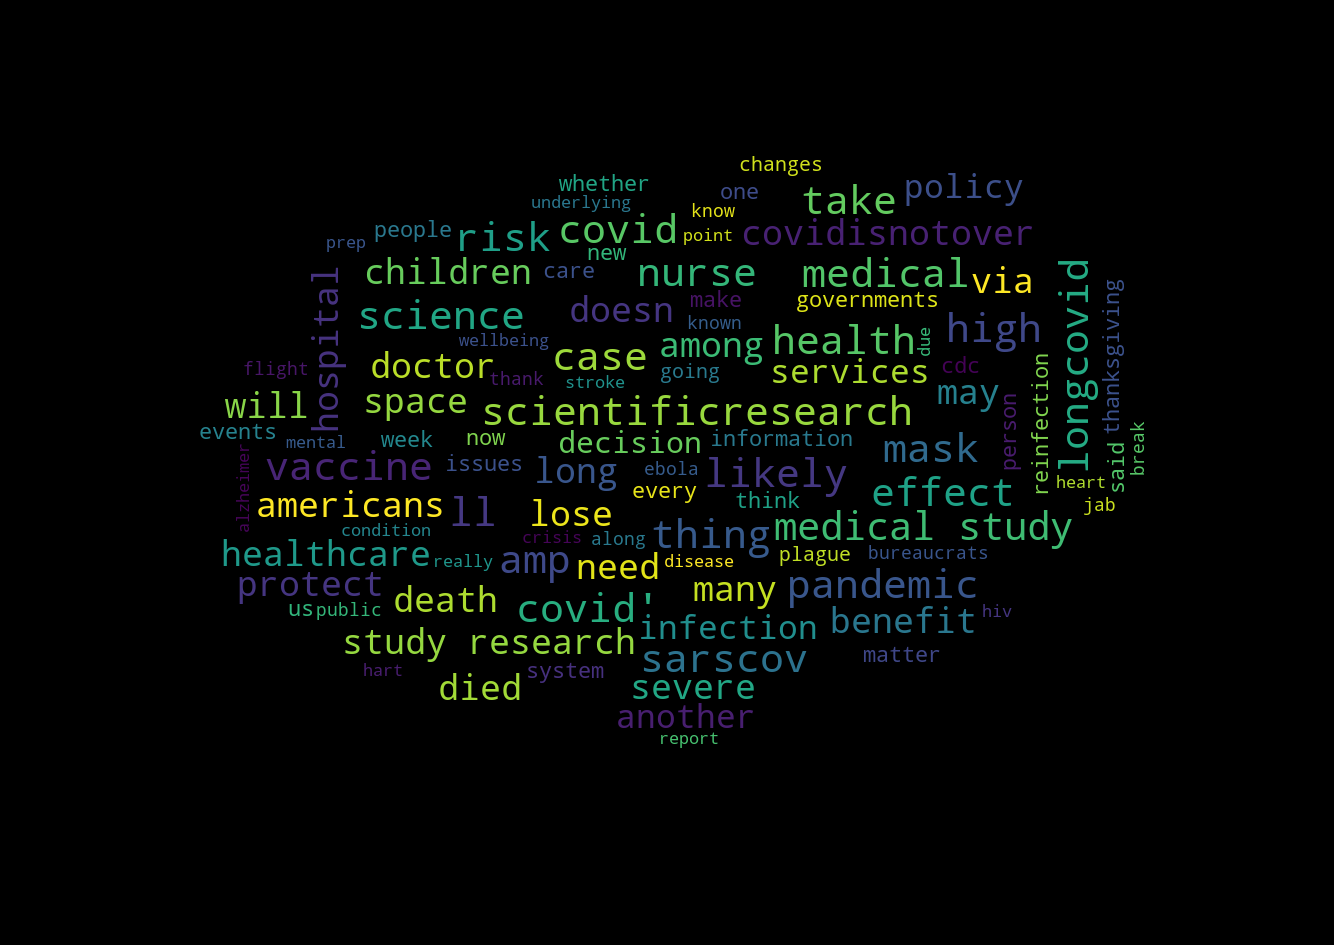

In [169]:
create_wordcloud(df_eda,'cleaned_tweets')
# create_wordcloud(df_string,'cleaned_tweets')

Word Cloud for cleaned_tweets_neutral saved successfully


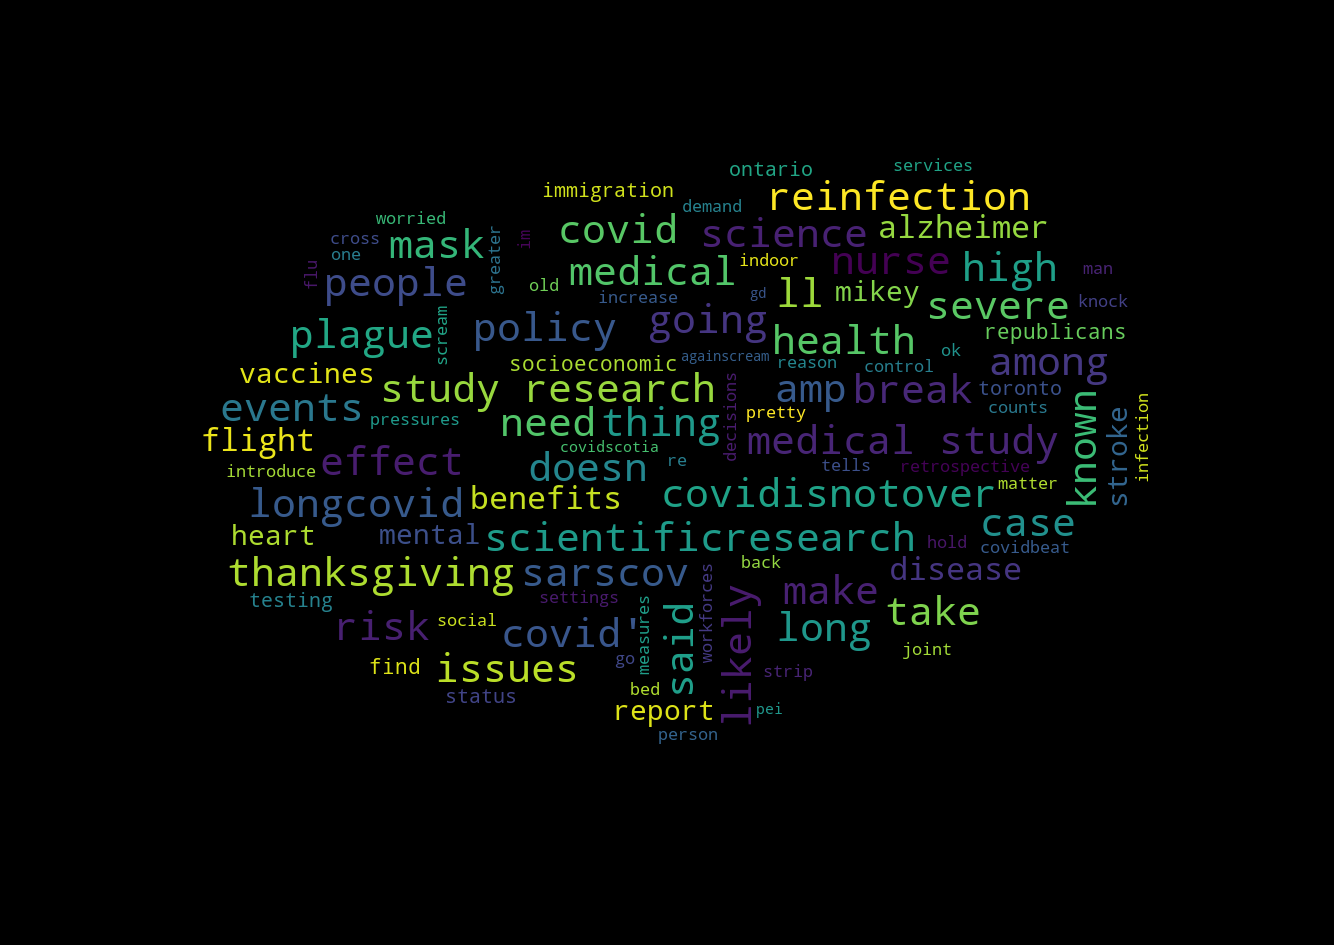

In [170]:
create_wordcloud(df_neutral,'cleaned_tweets_neutral')

Word Cloud for cleaned_tweets_positive saved successfully


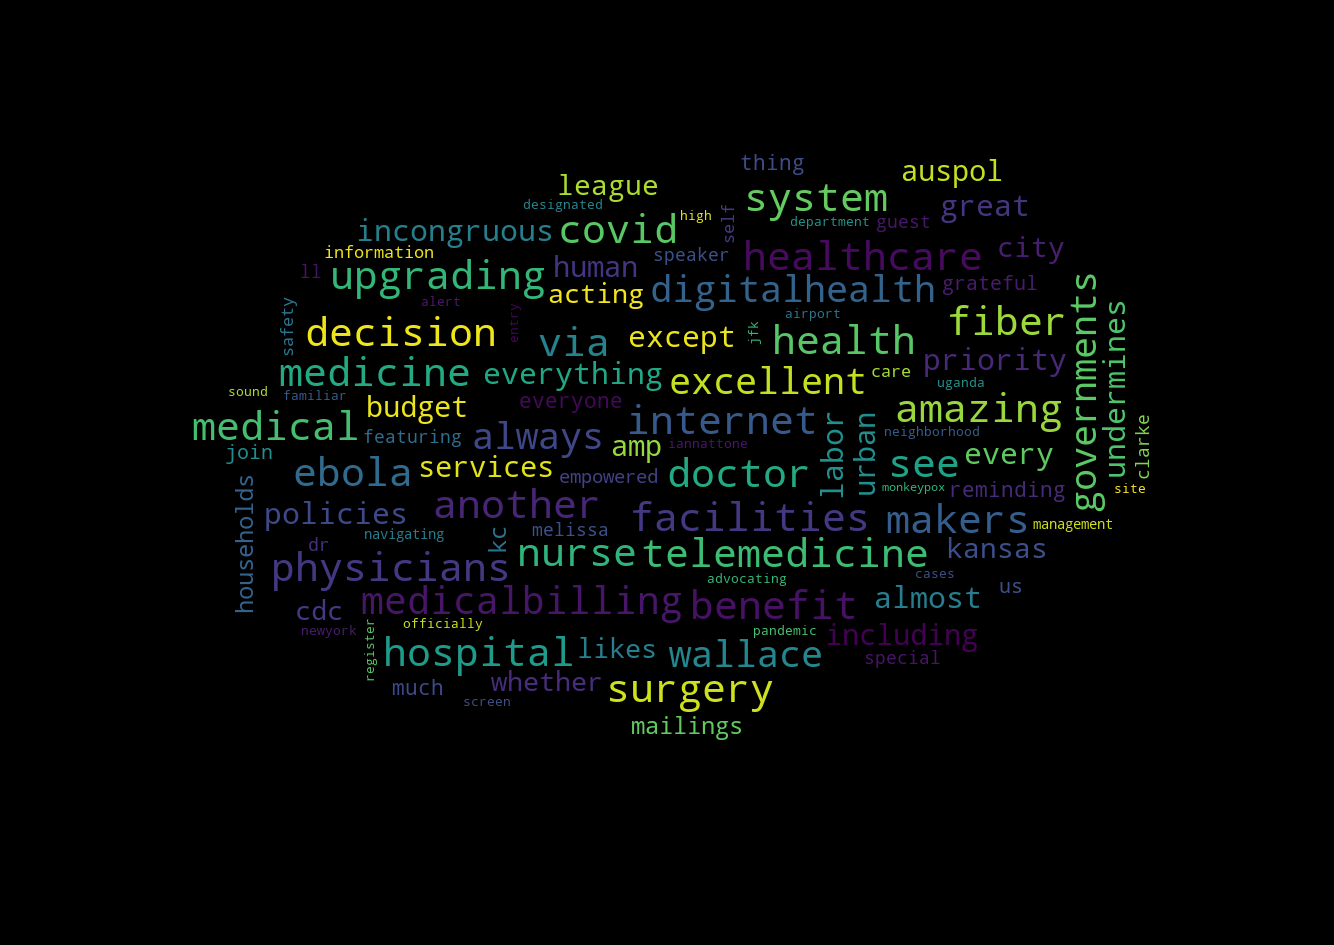

In [171]:
create_wordcloud(df_positive,'cleaned_tweets_positive')

Word Cloud for cleaned_tweets_negative saved successfully


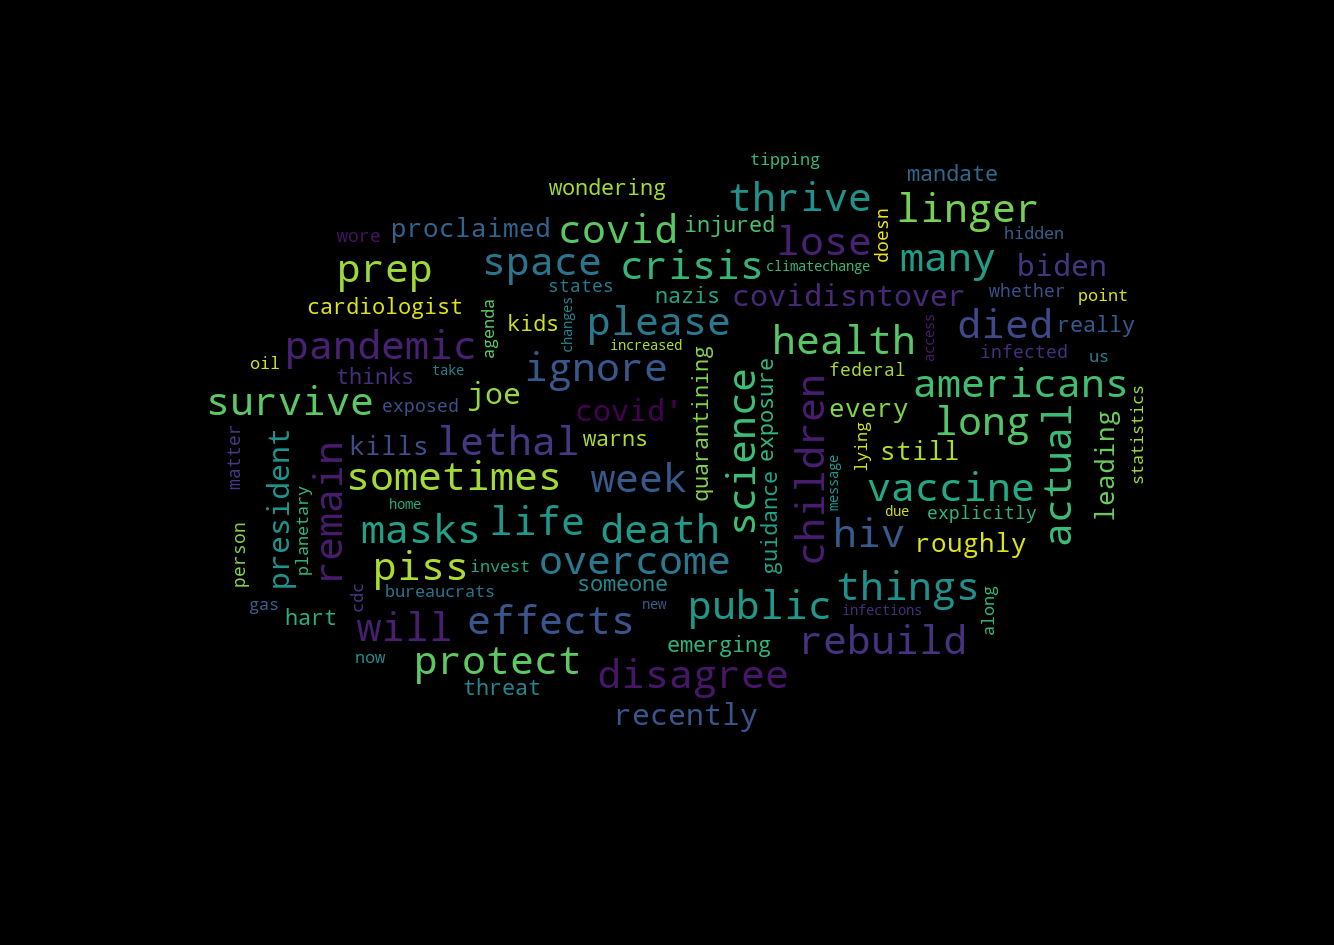

In [172]:
create_wordcloud(df_negative,'cleaned_tweets_negative')

#### **Exporting**

In [176]:
sentiment_mapping = {'negative':-1,'neutral':0,'positive':1}
df_eda['sentiment_label_values'] = df_eda.sentiment.map(sentiment_mapping)
# df_text.drop(columns=['sentiment_label_values'],inplace=True)
# Refer to "veh_copy_git" project

In [177]:
df_eda.head()

,cleaned_tweets,sentiment,sentiment_label_values
0,the lethal effects of covid will remain as lon...,negative,-1
1,scientificresearch socioeconomic and immigrat...,neutral,0
2,what about covid health decisions go to bed o...,neutral,0
3,you can lose many things and rebuild you can s...,negative,-1
4,we re worried about covid and about flu joint...,neutral,0


In [178]:
df_eda[['cleaned_tweets','sentiment_label_values']].to_csv('tweet_word2vex_for_prediction.csv',index=False)